# Практическое задние к уроку 3 

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [6]:
train_images = (train_images / 255.0)

test_images = (test_images / 255.0)

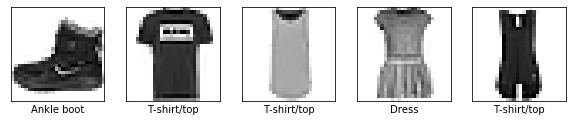

In [7]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4735 - accuracy: 0.8304
Epoch 2/2
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3578 - accuracy: 0.8683
10000/1 - 0s - loss: 0.2925 - accuracy: 0.8645
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4692 - accuracy: 0.8299
Epoch 2/3
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3577 - accuracy: 0.8664
Epoch 3/3
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3230 - accuracy: 0.8820
10000/1 - 0s - loss: 0.3116 - accuracy: 0.8677
Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4789 - accuracy: 0.8267
Epoch 2/4
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3571 - accuracy: 0.8683
Epoch 3/4
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3228 - accur

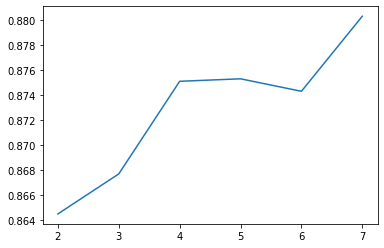

In [15]:
test_l=[]
test_a=[]
for epoch in range(2,8):
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(10)])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    model.fit(train_images, train_labels, epochs=epoch)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    test_l.append(test_loss)
    test_a.append(test_acc)
plt.plot(range(2,8),test_a)    

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.4908 - accuracy: 0.8233
Epoch 2/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3690 - accuracy: 0.8636
Epoch 3/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3325 - accuracy: 0.8772
Epoch 4/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3102 - accuracy: 0.8839
Epoch 5/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2938 - accuracy: 0.8906
10000/1 - 0s - loss: 0.2810 - accuracy: 0.8688
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.4719 - accuracy: 0.8299
Epoch 2/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3564 - accuracy: 0.8694
Epoch 3/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.3236 - accuracy: 0.8803
Epoch 4/5
60000/60000 [==============================] 

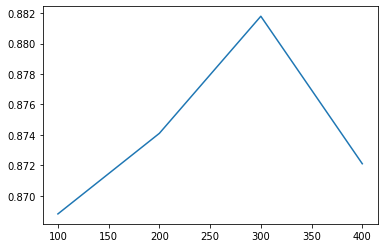

In [17]:
test_l=[]
test_a=[]
for nr in [100,200,300,400]:
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(nr, activation='relu'),
    keras.layers.Dense(nr, activation='relu'),
    keras.layers.Dense(10)])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    model.fit(train_images, train_labels, epochs=5)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    test_l.append(test_loss)
    test_a.append(test_acc)
plt.plot([100,200,300,400],test_a)    

# 2. Вывод:
### - Увеличение количества эпох позваляет увеличить точность но после некоторого значения точность повышается незначительство, по сравнению с временем обработки
### - Увеличение числа нейронов для данного сета после 300 идет снижение точности
### - Добавление слоев опять же при усложнении архитиктуры прирост точности незначительный по сравнению с ресурсоемкостью
### - подбор функции активации (заметного влияния не было)

## 3. 
### model.summary() сведения о модели. ,model.count_params()-число параметров модели, tuner.search() подбор гиперпараметров